<a href="https://colab.research.google.com/github/Naveen-01A/ML_Netflix_Movies_Recommendations/blob/main/Netflix_Movies_and__TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **NEFLIX MOVIES AND TV SHOWS CLUSTERING**


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** **Naveen Akula**


# **Project Summary -**

Netflix, the world’s largest online streaming platform, serves over 220 million subscribers as of Q2 2022. To enhance user experience and reduce subscriber churn, it is essential to effectively cluster the shows hosted on the platform. By organizing shows into distinct groups, Netflix can offer more personalized recommendations, helping users discover content aligned with their interests.

The objective of this project is to classify Netflix shows into clusters where shows within the same cluster share similarities, while those in different clusters exhibit significant differences. This clustering will aid in content recommendation, enhancing engagement and improving customer retention.

Dataset Overview:

Rows: 7,787

Columns: 12

The data will serve as the foundation for creating meaningful clusters and analyzing patterns in the available shows.

# **GitHub Link -**

provide the github link

# **Problem Statement**



Netflix needs to efficiently cluster its vast collection of 7,787 shows to improve content discovery and personalize recommendations for users. By grouping similar shows together, the goal is to enhance user experience, increase engagement, and reduce subscriber churn.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from ast import increment_lineno
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk

# import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('worndnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Error loading worndnet: Package 'worndnet' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',encoding='ISO-8859-1')


In [3]:
# Reading data
path = '/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

original_df = pd.read_csv(path,index_col='show_id')
df = original_df.copy()

### Dataset First View

In [4]:
# Retrieving the 1st few rows of the DataFrame to inspect its structure and contents
df.head()

type  title           director  \
show_id                                      
s1       TV Show     3%                NaN   
s2         Movie   7:19  Jorge Michel Grau   
s3         Movie  23:59       Gilbert Chan   
s4         Movie      9        Shane Acker   
s5         Movie     21     Robert Luketic   

                                                      cast        country  \
show_id                                                                     
s1       João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
s2       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
s3       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
s4       Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
s5       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

                date_added  release_year rating   duration  \
show_id                                                      
s1         August 14, 2020          2020  TV-MA  4 Seasons   
s2       December 23, 2016          2016  TV-MA     93 min   
s3       December 20, 2018          2011      R     78 min   
s4       November 16, 2017          2009  PG-13     80 min   
s5         January 1, 2020          2008  PG-13    123 min   

                                                 listed_in  \
show_id                                                      
s1       International TV Shows, TV Dramas, TV Sci-Fi &...   
s2                            Dramas, International Movies   
s3                     Horror Movies, International Movies   
s4       Action & Adventure, Independent Movies, Sci-Fi...   
s5                                                  Dramas   

                                               description  
show_id                                                     
s1       In a future where the elite inhabit an island ...  
s2       After a devastating earthquake hits Mexico Cit...  
s3       When an army recruit is found dead, his fellow...  
s4       In a postapocalyptic world, rag-doll robots hi...  
s5       A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# retrieving the dimensions (number of rows and columns) of the dataframe
df.shape

(7787, 11)

**The dataset contains 7787 records and 11 attributes.**

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


#### Duplicate Values

In [7]:
# Checking for duplicate rows in the Dataframe
duplicate_rows = df[df.duplicated()]

# checking if there are any duplicate rows
if duplicate_rows.shape[0] > 0:
  print('Duplicate rows found :',duplicate_rows)
else:
  print('No duplicate rows found')


No duplicate rows found


#### Missing Values/Null Values

In [8]:
df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Checking for missing values in the Dataframe
missing_values = df.isnull().sum()


<Axes: ylabel='show_id'>

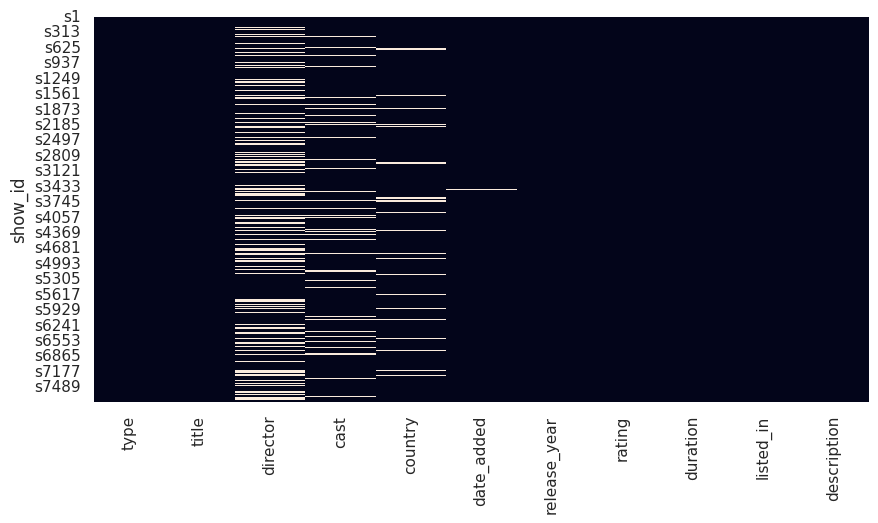

In [10]:
# Visualizing the missing values
# Checking Null Values by plotting Heatmap

plt.figure(figsize= (10, 5))
sns.heatmap(df.isnull(), cbar=False)


There are many missing values in director, cast, country, date_added, and rating columns.

###  Attribute Information
1) show_id : Unique ID for every Movie / Tv Show

2) type : Identifier - A Movie or TV Show

3) title : Title of the Movie / Tv Show

4) director : Director of the Movie

5) cast : Actors involved in the movie / show

6) country : Country where the movie / show was produced

7) date_added : Date it was added on Netflix

8) release_year : Actual Releaseyear of the movie / show

9) rating : TV Rating of the movie / show

10) duration : Total Duration - in minutes or number of seasons

11) listed_in : Genre

12) description: The Summary description

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 988.1+ KB


In [12]:
missing_values

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

What did you know about your dataset?

* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

* 10 records with missing values in the date_added column can be dropped.

* The missing values in rating can be imputed with its mode, since this attribute is discrete.

## ***2. Understanding Your Variables***

In [13]:
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [14]:
df.shape

(7787, 11)

In [15]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Variables Description

Here's a brief description of each column:


* type – Whether the content is a movie or TV show.

* title – The name of the movie or TV show.

* director – The director(s) of the content.

* cast – List of actors featured in the content.

* country – Country where the content was produced.

* date_added – The date the content was added to the platform.It has to change to date type.

* release_year – The year the content was released.It also has to change to date.

* rating – Content rating (e.g., PG, R, etc.).

* duration – Length of the movie or number of seasons for a TV show. It has to convert to integer.

* listed_in – Categories or genres the content belongs to.

* description – A short summary of the content.

In [16]:
# Checking the unique values in each attribute of the dataset
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Handling the missing values
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [18]:
df.shape

(7777, 11)

### What all manipulations have you done and insights you found?


The missing values in the 'director', 'cast', and 'country' columns were replaced with 'Unknown'.

The missing values in the 'rating' column were filled with the most frequent rating (mode).

Rows with other missing values were dropped to ensure a clean dataset for analysis or clustering.

We have successfully handled all the missing values in the dataset.

### Countryt, listed_in

In [19]:
# Top countries
df.country.value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [20]:
# Genre of shows
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.

* Also, let's consider only the primary genre of the respective movie / TV show.

In [21]:
# Choosing the primary country and primary genre to simplify the analysis

df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])


In [22]:
# country in which a movie was produced

df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [23]:
# Genre of the shows

df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
TV Shows                          12
Cult Movies                       12
Sci-Fi & Fantasy                  11
TV Horror                         10
Romantic Movies                    3
Spanish-Language TV Shows          2
Sports Movies                      1
TV Sci-Fi & Fantasy                1
LGBTQ Movies                       1
Name: count, dtype: int64

### Typecasting 'duration' from string to integer

In [24]:
# Splitting the duration column, and changing the datatype in integer

df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
# Number of seasons for TV shows

df[df['type'] == 'TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

In [26]:
# Movie length in minutes

df[df['type'] == 'Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [27]:
# Datatype of duration

df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

###  Typecasting 'date_added' from string to datetime:

In [28]:
# Typecasting 'date_added' from string to datetime

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [29]:
# First and Last date on which a show was added on Netflix

df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [30]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis = 1, inplace= True)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Rating :

The ratings can be changed to age restrictions that apply on certain movies and TV shows.


[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)


### Distribution of Ratings

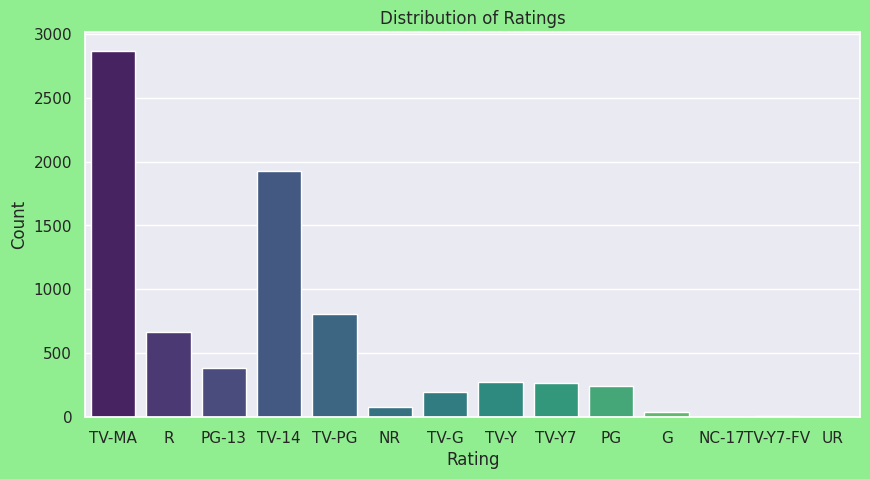

In [31]:
# Age ratings for show in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (10, 5), facecolor='lightgreen')
sns.countplot(x= 'rating', data =df, palette= 'viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG.**

In [32]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [33]:
# Changing the values in the rating column
rating_map = {'TV-MA': 'Adults',
              'R': 'Adults',
              'PG-13': 'Teens',
              'TV-14': 'Young Adults',
              'TV-PG': 'Older Kids',
              'NR': 'Adults',
              'TV-G': 'Kids',
              'TV-Y': 'Kids',
              'TV-Y7': 'Older Kids',
              'PG': 'Older Kids',
              'G': 'Kids',
              'NC-17': 'Adults',
              'TV-Y7-FV': 'Older Kids',
              'UR': 'Adults'}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

###  Age rating Count

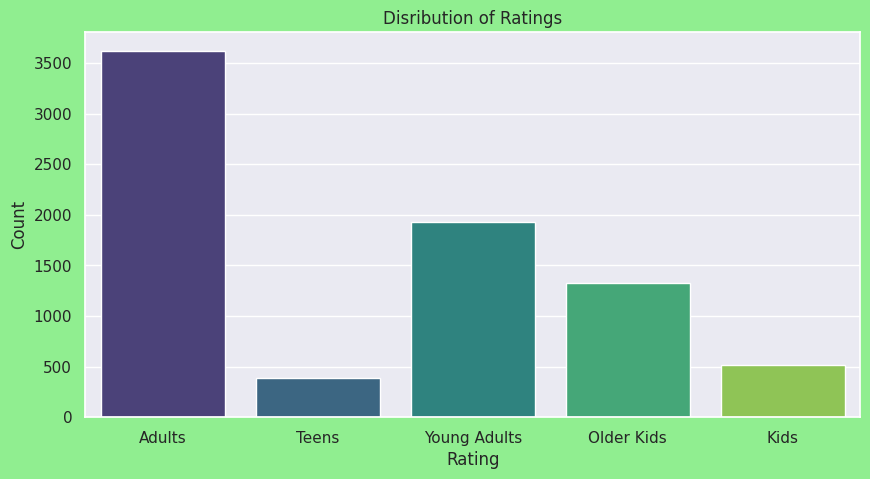

In [34]:
# Age rating for shows in the dataset
plt.figure(figsize= (10, 5),facecolor='lightgreen')
sns.countplot(x= 'rating', data = df, palette= 'viridis')
plt.title('Disribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.**

##### 1. Why did you pick the specific chart?


This type of bar chart quickly highlights which ratings are most common in the dataset, making it easy to interpret audience segmentation based on age restrictions.

##### 2. What is/are the insight(s) found from the chart?

Around 50% of shows on Netflix are produced for adult audience. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By addressing any imbalances in content rating distribution, the platform can diversify its offerings to maximize audience reach and minimize the risk of losing specific viewer segments.

### Univariate Analysis

### Movies vs TV Shows

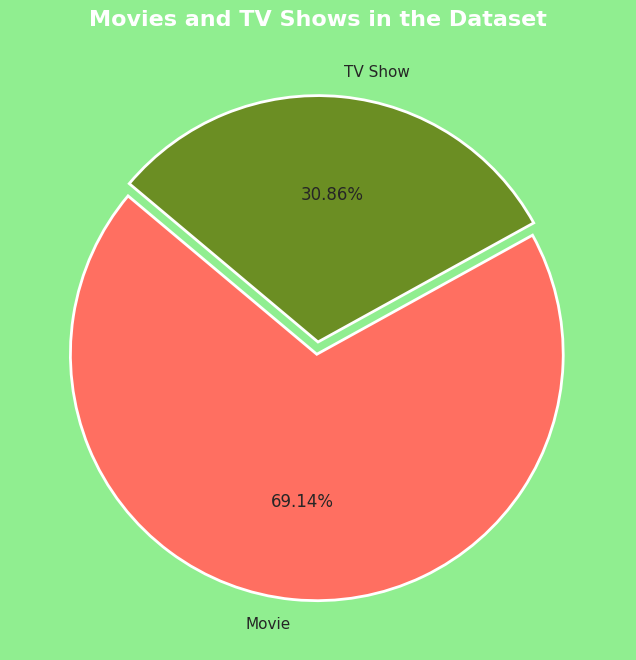

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8), facecolor='lightgreen')  # Black background
colors = ['#ff6f61', '#6b8e23']  # Custom colors for slices
explode = (0.05, 0)  # Slightly separate the first slice (Movies)

df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.ylabel('')
plt.title('Movies and TV Shows in the Dataset', color='white', fontsize=16, fontweight='bold')
plt.gca().set_facecolor('white')  # Set axes background to black
plt.show()


**There are more movies (69.14%) than TV shows (30.86%) in the dataset.**

##### 1. Why did you pick the specific chart?

Pie charts are effective for showing relative percentages of categorical data, making it easy to compare.

##### 2. What is/are the insight(s) found from the chart?

The chart likely shows that movies make up a larger portion(nearly 70%) of the dataset compared to TV shows(30% only).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increasing the availability of TV shows or expanding movie options to ensure a broader appeal across different audience preferences.

### Top 10 Directors by Number of Shows Directed

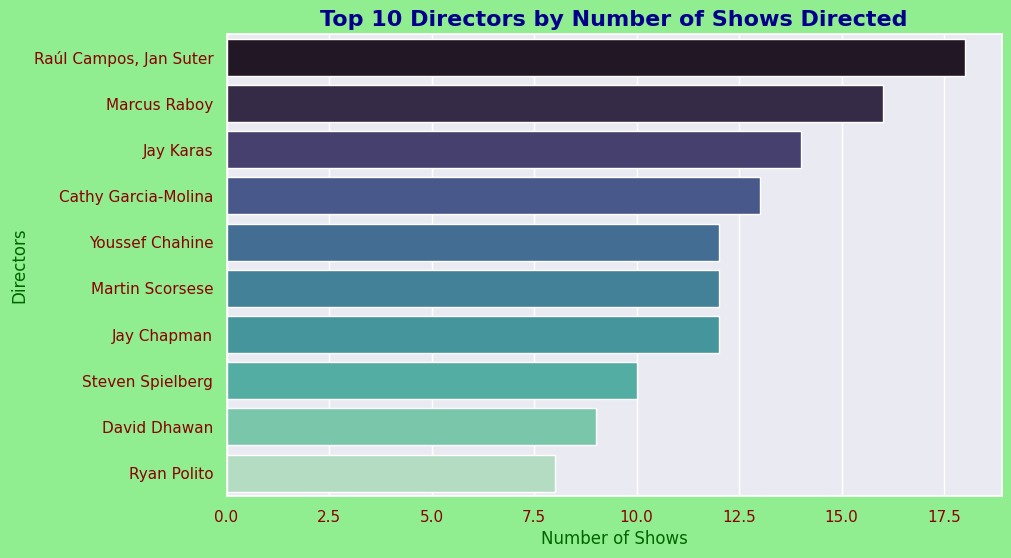

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6),facecolor= 'lightgreen')
top_10_directors = df[~(df['director'] == 'Unknown')]['director'].value_counts().nlargest(10)

# Create a barplot with a vibrant color palette
sns.barplot(
    x=top_10_directors.values,
    y=top_10_directors.index,
    palette='mako'
)

plt.title('Top 10 Directors by Number of Shows Directed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Shows', fontsize=12, color='darkgreen')
plt.ylabel('Directors', fontsize=12, color='darkgreen')

# Customize the tick colors
plt.xticks(color='darkred')
plt.yticks(color='darkred')

plt.show()


**Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for visualizing categorical data with long labels (director names) and allows easy comparison of values.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enables targeted marketing by promoting shows directed by popular directors, boosting viewership.
And investing in emerging directors could mitigate this risk and foster innovation.

In [37]:
# Top 10 countries with the highest number / TV shows in the dataset

plt.figure(figsize= (10, 5))
df

type                                    title           director  \
show_id                                                                        
s1       TV Show                                       3%            Unknown   
s2         Movie                                     7:19  Jorge Michel Grau   
s3         Movie                                    23:59       Gilbert Chan   
s4         Movie                                        9        Shane Acker   
s5         Movie                                       21     Robert Luketic   
...          ...                                      ...                ...   
s7783      Movie                                     Zozo        Josef Fares   
s7784      Movie                                   Zubaan        Mozez Singh   
s7785      Movie                        Zulu Man in Japan            Unknown   
s7786    TV Show                    Zumbo's Just Desserts            Unknown   
s7787      Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Sam Dunn   

                                                      cast         country  \
show_id                                                                      
s1       João Miguel, Bianca Comparato, Michel Gomes, R...          Brazil   
s2       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...          Mexico   
s3       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...       Singapore   
s4       Elijah Wood, John C. Reilly, Jennifer Connelly...   United States   
s5       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   United States   
...                                                    ...             ...   
s7783    Imad Creidi, Antoinette Turk, Elias Gergi, Car...          Sweden   
s7784    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...           India   
s7785                                              Nasty C         Unknown   
s7786                           Adriano Zumbo, Rachel Khoo       Australia   
s7787                                              Unknown  United Kingdom   

         release_year        rating  duration               listed_in  \
show_id                                                                 
s1               2020        Adults         4  International TV Shows   
s2               2016        Adults        93                  Dramas   
s3               2011        Adults        78           Horror Movies   
s4               2009         Teens        80      Action & Adventure   
s5               2008         Teens       123                  Dramas   
...               ...           ...       ...                     ...   
s7783            2005        Adults        99                  Dramas   
s7784            2015  Young Adults       111                  Dramas   
s7785            2019        Adults        44           Documentaries   
s7786            2019    Older Kids         1  International TV Shows   
s7787            2019        Adults        90           Documentaries   

                                               description  month_added  \
show_id                                                                   
s1       In a future where the elite inhabit an island ...            8   
s2       After a devastating earthquake hits Mexico Cit...           12   
s3       When an army recruit is found dead, his fellow...           12   
s4       In a postapocalyptic world, rag-doll robots hi...           11   
s5       A brilliant group of students become card-coun...            1   
...                                                    ...          ...   
s7783    When Lebanon's Civil War deprives Zozo of his ...           10   
s7784    A scrappy but poor boy worms his way into a ty...            3   
s7785    In this documentary, South African rapper Nast...            9   
s7786    Dessert wizard Adriano Zumbo looks for the nex...           10   
s7787    This documentary delves into the mystique behi...            3   

         year_added  
show_id 

<Figure size 1000x500 with 0 Axes>

### Top 10 Countries

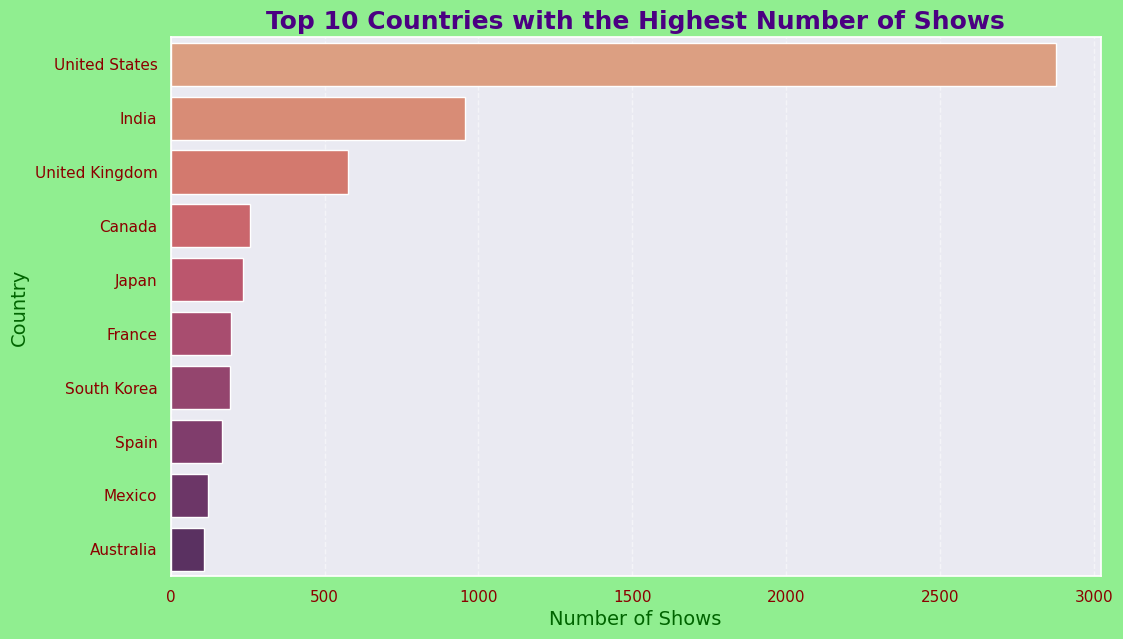

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7), facecolor = 'lightgreen')
top_10_countries = df[~(df['country'] == 'Unknown')]['country'].value_counts().nlargest(10)

# Create a horizontal bar plot with a vibrant color palette
sns.barplot(
    x=top_10_countries.values,
    y=top_10_countries.index,
    palette='flare'
)

plt.title('Top 10 Countries with the Highest Number of Shows', fontsize=18, fontweight='bold', color='#4B0082')
plt.xlabel('Number of Shows', fontsize=14, color='#006400')
plt.ylabel('Country', fontsize=14, color='#006400')

# Customize the tick colors and grid
plt.xticks(color='#8B0000')
plt.yticks(color='#8B0000')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

**The highest number of movies / TV shows were based out of the US, followed by India and UK.**

##### 1. Why did you pick the specific chart?

A horizontal bar plot is ideal for ranking data, making comparisons easier by aligning the countries on the y-axis and their corresponding show counts on the x-axis.

##### 2. What is/are the insight(s) found from the chart?

A few countries, likely the US, India, and UK, dominate content production, suggesting that the platform relies heavily on content from these regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Expanding content from top-performing countries ensures alignment with viewer preferences, driving engagement and subscriptions.


In [39]:
# % share of Movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/ len(df)*100


56.69281213835669

In [40]:
df.country.value_counts().nlargest(10).sum() / len(df)*100

78.32068921177832

The top 3 countries together account for about 56% of all movies and TV shows in the dataset.

This value increases to about 78% for top ten countries.

### Movie / TV Show was released per Year

Text(0.5, 1.0, 'Distribution by released year.')

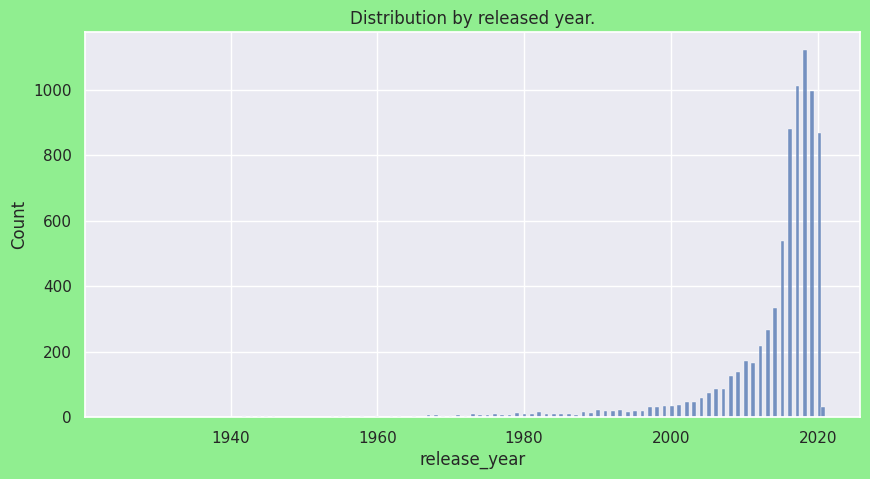

In [41]:
# Visualizing the year in which the movie / TV Show was released

plt.figure(figsize= (10, 5), facecolor='lightgreen')
sns.histplot(df['release_year'])
plt.title('Distribution by released year.')

##### 1. Why did you pick the specific chart?

A histogram was chosen because it efficiently shows the frequency distribution of movies and TV shows by release year.

##### 2. What is/are the insight(s) found from the chart?

The chart likely shows higher content production in recent years, reflecting growth in the entertainment industry.

Peaks could correspond to specific years with significant content releases or platform expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Understanding release year trends helps the platform curate content based on audience preferences for specific time periods.

Expanding the library to include older, timeless content can attract a broader audience, boosting user retention.

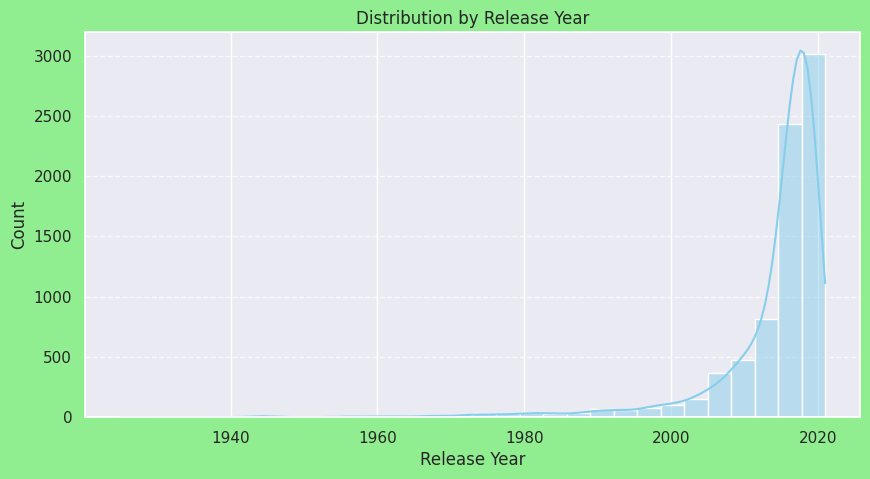

In [42]:
# Visualizing the year in which the movie / TV Show was released

plt.figure(figsize=(10, 5), facecolor='lightgreen')
sns.histplot(df['release_year'], kde=True, color='skyblue', bins=30)
plt.title('Distribution by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Top 10 Genres

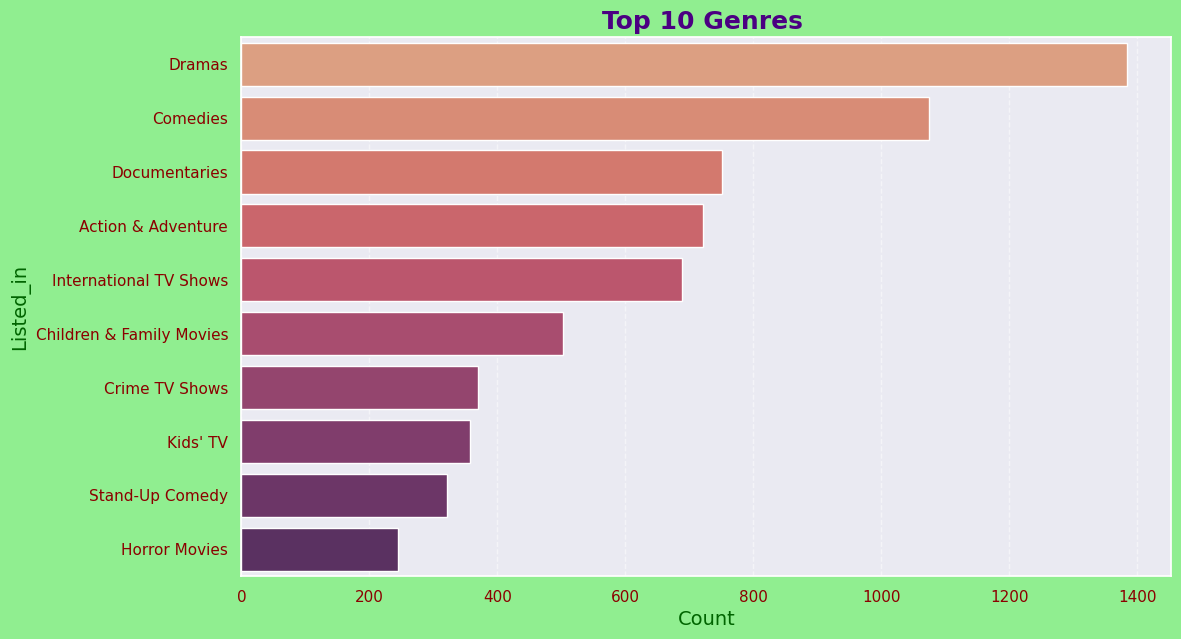

In [43]:
#Top 10 Genres

# Create a horizontal bar plot with a vibrant color palette
top_10_genres = df['listed_in'].value_counts().nlargest(10)


plt.figure(figsize=(12, 7), facecolor = 'lightgreen')
sns.barplot(
    x=top_10_genres.values,
    y=top_10_genres.index,
    palette='flare'
)

plt.title('Top 10 Genres ', fontsize=18, fontweight='bold', color='#4B0082')
plt.xlabel('Count', fontsize=14, color='#006400')
plt.ylabel('Listed_in', fontsize=14, color='#006400')

# Customize the tick colors and grid
plt.xticks(color='#8B0000')
plt.yticks(color='#8B0000')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [44]:
# Share the top 3 genres

df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [45]:
# Share of the 10 Genres

df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

* The dramas is the most popular genre followed by comedies and documentaries.

* These three genres account for about 41% of all movies and TV shows.

* This value increases to about 82% for top 10 genres.

##### 1. Why did you pick the specific chart?

A horizontal bar plot  effectively displays categorical data, especially when the labels (genres) are long, and provides a clear visualization of the most popular genres.


##### 2. What is/are the insight(s) found from the chart?

* The dramas is the most popular genre followed by comedies and documentaries.

* These three genres account for about 41% of all movies and TV shows.

* This value increases to about 82% for top 10 genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing top genres helps with content acquisition strategies, ensuring the platform targets what audiences enjoy most.

### Shows Added per Month

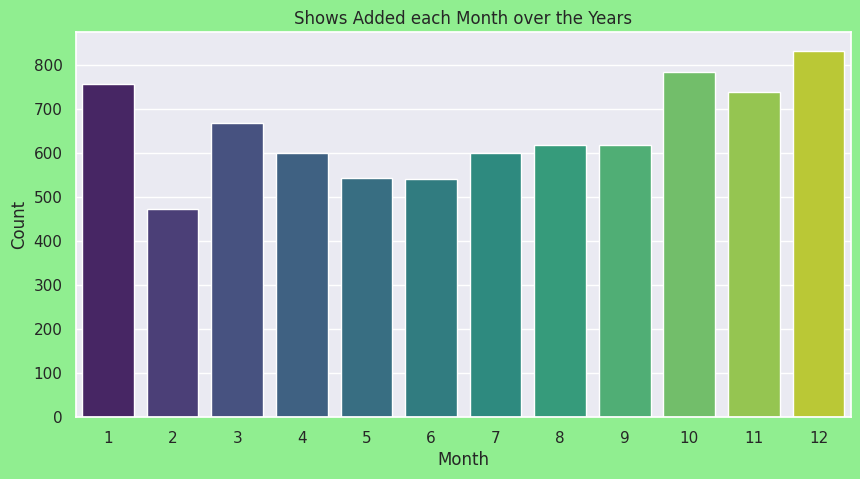

In [46]:
# Number of shows added on different

plt.figure(figsize=(10, 5), facecolor='lightgreen')
sns.countplot(x='month_added', data=df, palette='viridis')
plt.title('Shows Added each Month over the Years')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Over the years a greater number of shows were added in the months of October, November, December, and January.

##### 1. Why did you pick the specific chart?

A countplot effectively shows the frequency of shows added to the platform each month, helping to identify patterns, peak months, and any seasonal trends in content addition.

##### 2. What is/are the insight(s) found from the chart?

Over the years a greater number of shows were added in the months of October, November, December, and January.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying seasonal patterns could inform content acquisition strategies, ensuring a steady flow of content during peak months.

### Movies per Year

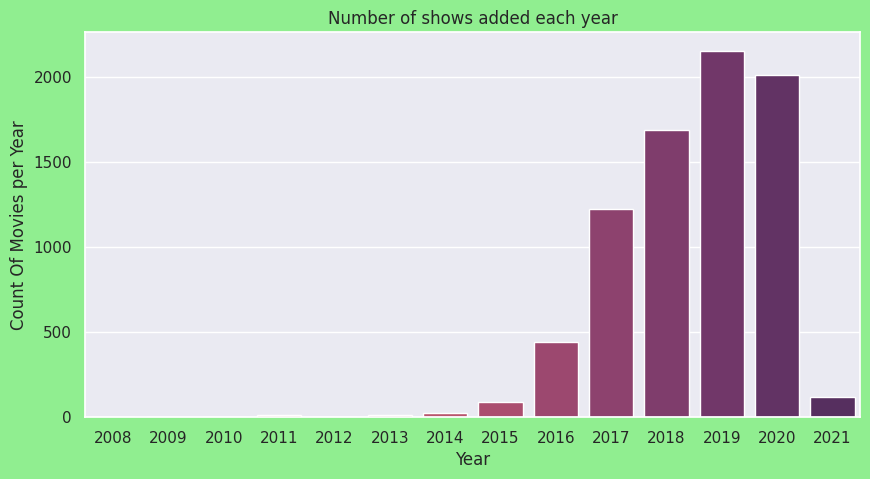

In [47]:
# Number of shows added over the years
plt.figure(figsize=(10, 5), facecolor= 'lightgreen')
sns.countplot(x='year_added', data = df, palette= 'flare')
plt.title('Number of shows added each year')
plt.xlabel('Year')
plt.ylabel('Count Of Movies per Year')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot helps to visualize the growth or decline in content additions year over year and can identify key years of increased or decreased content activity.

##### 2. What is/are the insight(s) found from the chart?

* Netflix continuous to add more shows on its platform over the years.

* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.

* We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to know the increasing og the Audience over years.

Peaks in content additions could signal successful content expansion, which can be further leveraged with marketing and promotions to drive user engagement.

The majority of the shows on Netflix are catered to the needs of adult and young adult population.

### Bivariate Analysis

### Movies and TV Shows vs Years

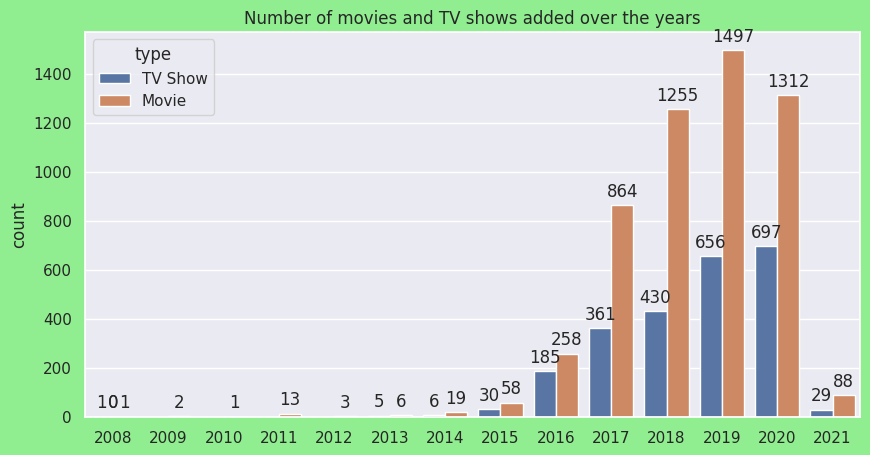

In [48]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5),facecolor= 'lightgreen')
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

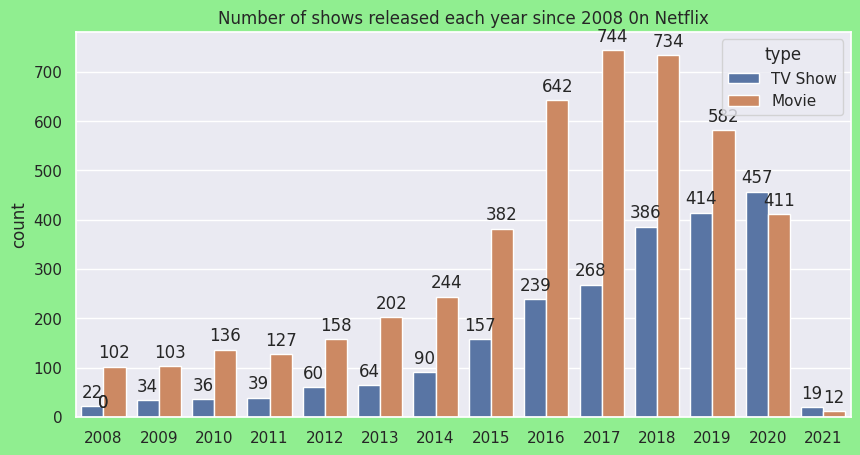

In [49]:
# Number of shoes released each year since 2008

order = range(2008,2022)
plt.figure(figsize=(10, 5),facecolor='lightgreen')
p = sns.countplot(x = 'release_year', data=df, hue='type', order = order)
plt.title('Number of shows released each year since 2008 0n Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(),'.0f'),(i.get_x() + i.get_width()/2., i.get_height()),
             ha='center', va= 'center', xytext=(0, 10), textcoords='offset points')

##### 1. Why did you pick the specific chart?

A countplot with hue was chosen because it shows both movies and TV shows added each year, allowing easy comparison between the two types of content.

##### 2. What is/are the insight(s) found from the chart?

* Over the years, Netflix has consistently focused on adding more shows in its platform.

* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.

* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the balance between movies and TV shows allows for content strategies that cater to both movie lovers and series enthusiasts,ensuring that diverse content types are available for all user segments.

### Tv Show vs Number of seasons

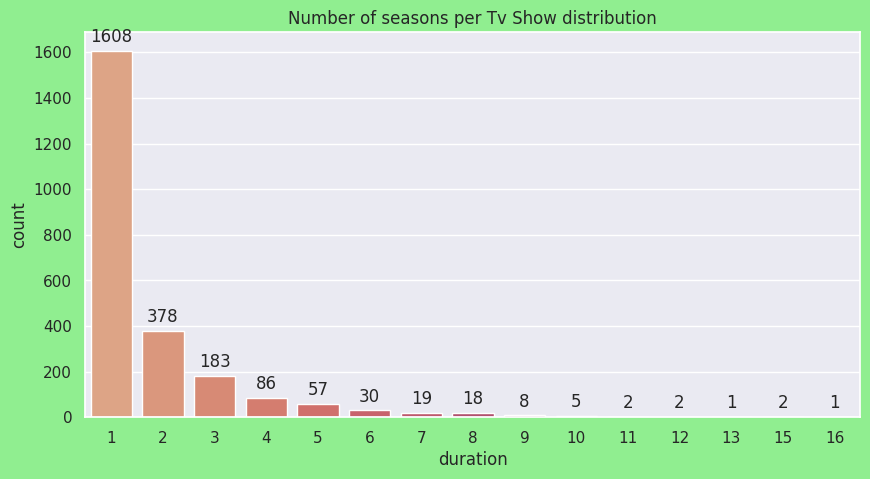

In [50]:
# Seasons in each TV show
plt.figure(figsize=(10, 5), facecolor='lightgreen')
p =sns.countplot(x= 'duration', data=df[df['type']=='TV Show'], palette='flare')
plt.title('Number of seasons per Tv Show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()),
             ha='center', va= 'center', xytext=(0,10), textcoords='offset points')

In [51]:
# % 0f TV shows with just 1 season

len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])*100


67.0

* The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

* There are very few TV shows that have more than 8 seasons.

##### 1. Why did you pick the specific chart?

A countplot was chosen to visualize the distribution of seasons in TV shows. It effectively shows the frequency of TV shows grouped by the number of seasons, helping to identify how many shows have a few versus many seasons.

##### 2. What is/are the insight(s) found from the chart?

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

There are very few TV shows that have more than 8 seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The lack of long-running shows could be seen as an opportunity to invest in developing more multi-season series to foster loyalty and engagement.

### Movies count vs Duration

Text(0.5, 1.0, 'Movie duration distribution')

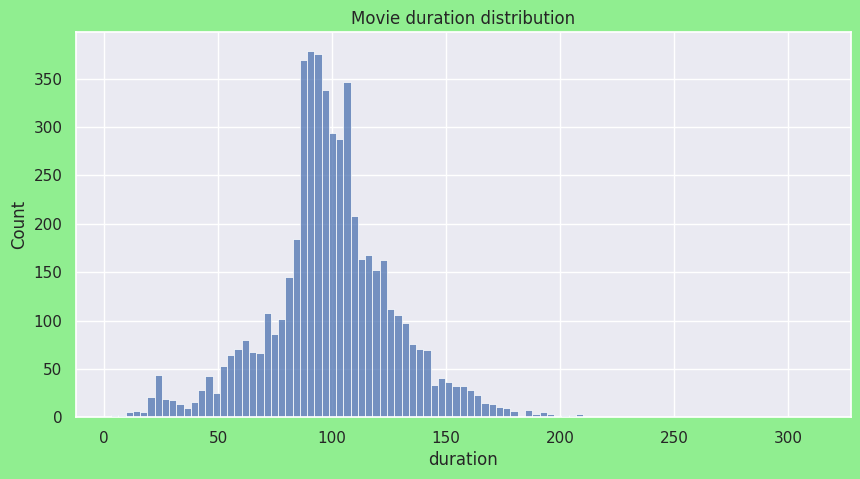

In [52]:
# Length of movie analysis

plt.figure(figsize=(10,5), facecolor= 'lightgreen')
sns.histplot(x='duration', data= df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [53]:
# Movie Statistics
df[df['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

##### 1. Why did you pick the specific chart?

A histogram was chosen because it effectively visualizes the distribution of movie durations, showing how movie lengths vary across the dataset.

##### 2. What is/are the insight(s) found from the chart?

This helps identify patterns, such as whether most movies tend to be short, medium-length, or long, and whether there are any common duration ranges preferred by users.



The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By recognizing the optimal movie length, the platform can curate content that appeals to audiences looking for either short-form or feature-length content, boosting engagement and satisfaction.

### Time Duration vs Years

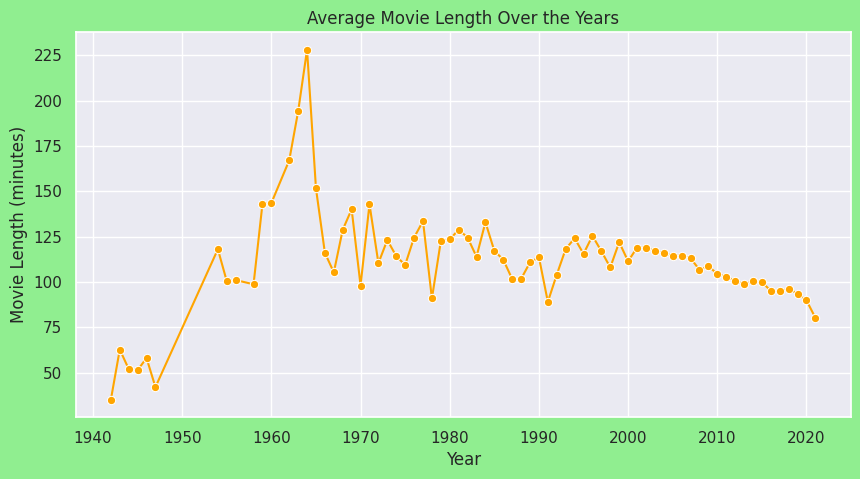

In [54]:
# Average movie length over the years

plt.figure(figsize=(10, 5), facecolor='lightgreen' )
avg_duration = df[df['type'] == 'Movie'].groupby('release_year')['duration'].mean().reset_index()

sns.lineplot(x='release_year', y='duration', data=avg_duration, color='orange',marker='o')
plt.title('Average Movie Length Over the Years')
plt.ylabel('Movie Length (minutes)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [55]:
# MOvie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

##### 1. Why did you pick the specific chart?

A line plot helps show whether the length of movies has increased or decreased over time, and the markers highlight individual data points for better clarity.

##### 2. What is/are the insight(s) found from the chart?

* Netflix has several movies on its site, including those that were released in way back 1942.

* As per the plot, movies made in the 1940s had a fairly short duration on average.

* On average, movies made in the 1960s have the longest movie length.

* The average length of a movie has been continuously decreasing since the 2000s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Top 10 genre for Movies

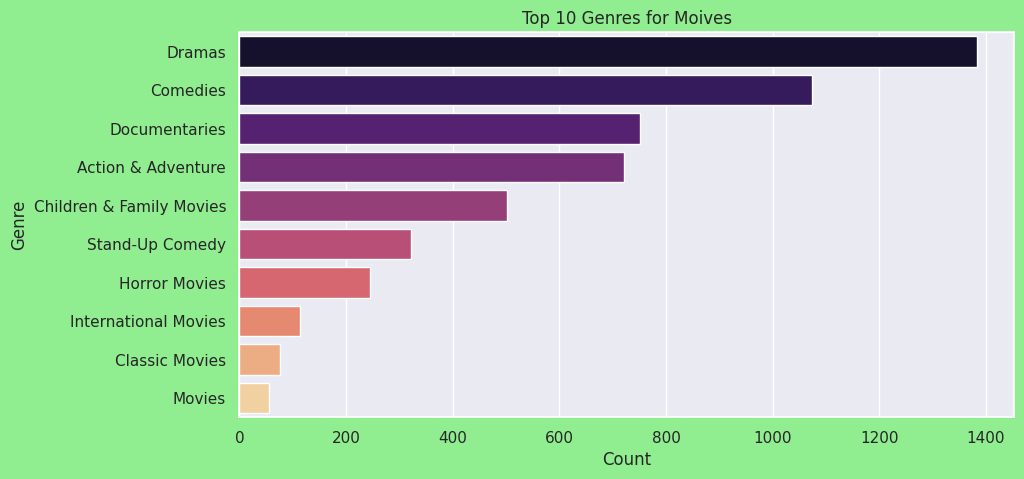

In [56]:
# Top 10 genre for movies

plt.figure(figsize=(10, 5), facecolor='lightgreen' )
top_genres = df[df['type'] == 'Movie']['listed_in'].value_counts().nlargest(10)

sns.barplot(x=top_genres.values, y = top_genres.index, palette='magma')
plt.title('Top 10 Genres for Moives')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot isualization makes it clear which genres are most popular on the platform, with the added benefit of using a color palette to highlight differences.

##### 2. What is/are the insight(s) found from the chart?

Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The platform can leverage this data for targeted marketing campaigns, promoting movies within these popular genres to maximize engagement.

### Top 10 genre for Tv Shows chart

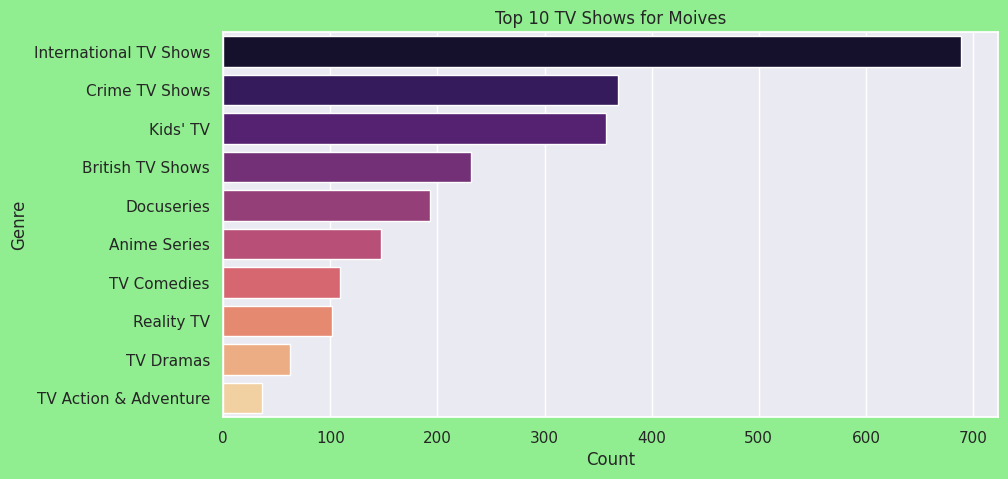

In [57]:
# Top 10 genre for Tv Shows

plt.figure(figsize=(10, 5), facecolor='lightgreen' )
top_genres = df[df['type'] == 'TV Show']['listed_in'].value_counts().nlargest(10)

sns.barplot(x=top_genres.values, y = top_genres.index, palette='magma')
plt.title('Top 10 TV Shows for Moives')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

This chart highlights which genres are most prevalent among TV shows, providing insight into audience preferences.

##### 2. What is/are the insight(s) found from the chart?

International, crime, and kids are the most popular genre for TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the TV shows allows for content strategies that cater to both movie lovers and series enthusiasts, appealing to a broader audience.

### Top 10 Movie director Chart

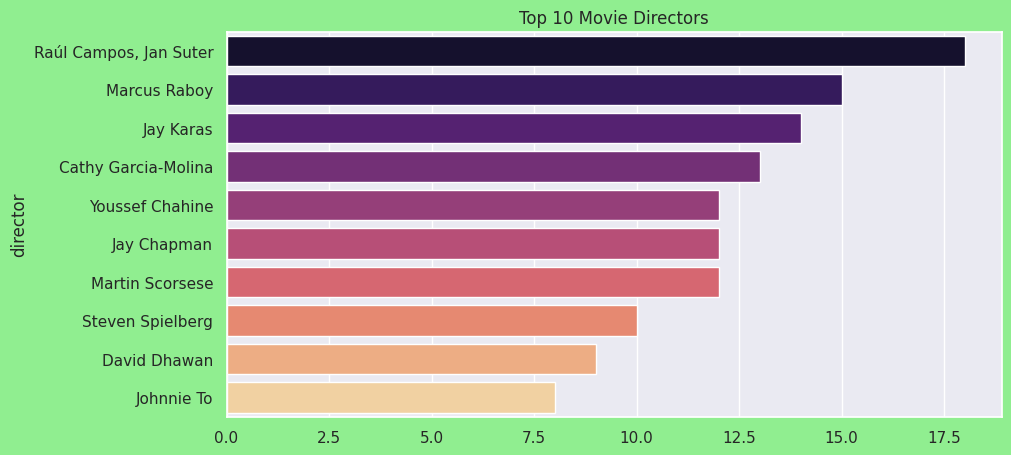

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), facecolor='lightgreen' )
# Filter the data and count the top 10 directors
top_10_directors = df[~(df['director'] == 'Unknown') & (df['type'] == 'Movie')]['director'].value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='magma')

# Set the title of the chart
plt.title('Top 10 Movie Directors')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart is ideal for comparing categorical data (directors) in a visually clear and direct way, with the values representing the number of movies directed.

##### 2. What is/are the insight(s) found from the chart?

* Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.

* This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlighting top directors in marketing or curation can boost viewer engagement, especially if the directors are already popular with specific audience segments.

### Top 10 TV Shows director Chart

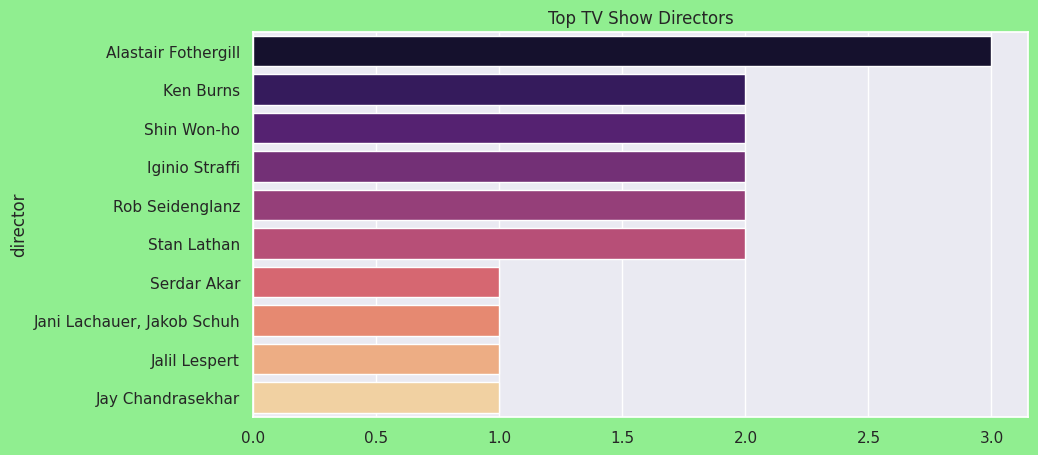

In [59]:
# Top 10 TV Shows director
plt.figure(figsize=(10, 5), facecolor='lightgreen' )
# Filter the data and count the top 10 directors
top_10_directors = df[~(df['director'] == 'Unknown') & (df['type'] == 'TV Show')]['director'].value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='magma')

# Set the title of the chart
plt.title('Top TV Show Directors')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot was chosen because it allows for easy comparison of the top 10 directors of TV shows based on the number of shows they have directed.

##### 2. What is/are the insight(s) found from the chart?

* Alastair Fothergill has directed three TV shows, the most of any director.

* Only six directors have directed more than one television show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The platform could also invest in emerging directors, diversifying the pool of content creators and offering a broader variety of shows.

### Top actors for movies Bar Chart

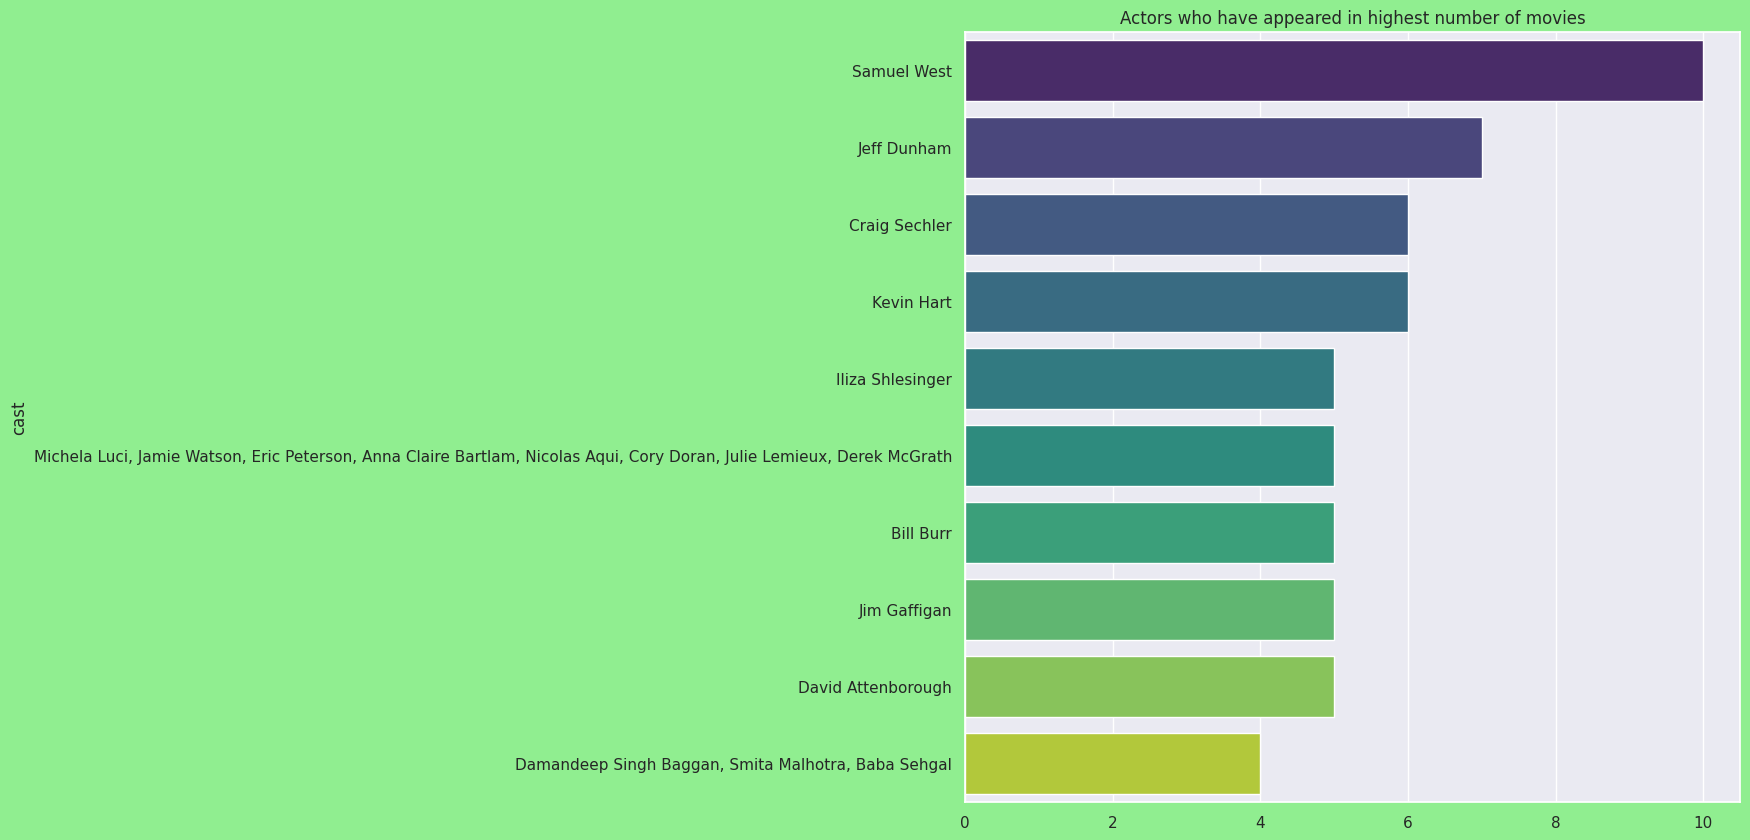

In [60]:
# Top actors for movies
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor='lightgreen' )
# Filter the data
top_actors = df[~(df['cast'] == 'Unknown') & (df['type'] == 'Movie')].cast.value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')

# Set the title of the chart
plt.title('Actors who have appeared in highest number of movies')
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal layout allows for better readability of actor names and makes it easier to compare their appearance frequency in movies.

##### 2. What is/are the insight(s) found from the chart?

Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By focusing on top actors, the platform can create marketing campaigns that highlight these stars, potentially driving more views and subscriptions.

### Top actors for TV Shows Bar Chart

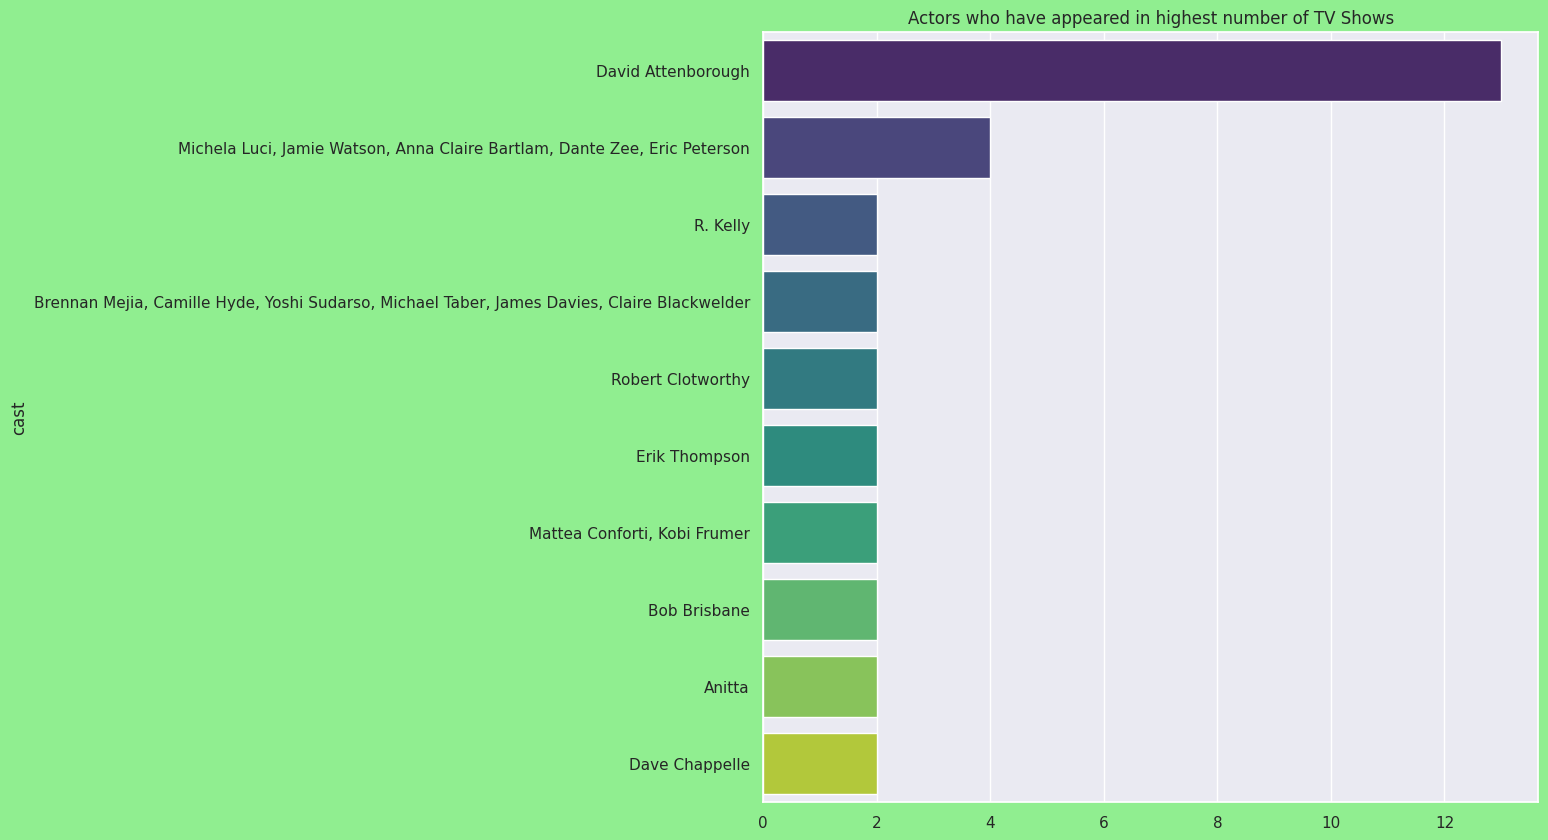

In [61]:
# Top actors for TV Shows
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor='lightgreen' )
# Filter the data
top_actors = df[~(df['cast'] == 'Unknown') & (df['type'] == 'TV Show')].cast.value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')

# Set the title of the chart
plt.title('Actors who have appeared in highest number of TV Shows')
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen because it effectively compares the top 10 actors based on their appearance in TV shows, making it easy to see which actors are most commonly featured.

##### 2. What is/are the insight(s) found from the chart?

David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Actors with high visibility can be leveraged in marketing campaigns, ensure a wide range of actors in TV shows, introducing fresh talent and appealing to diverse audience preferences.

### Wordcloud

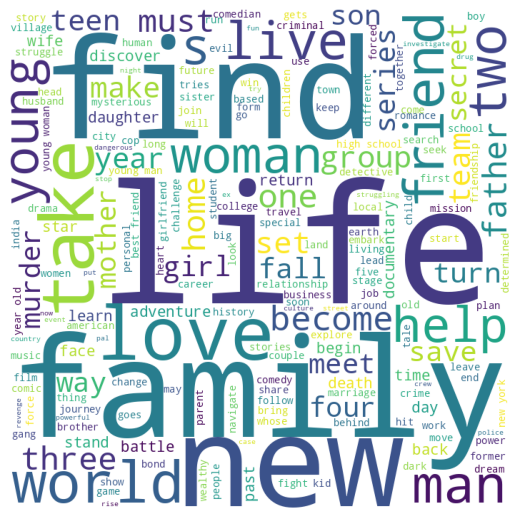

In [62]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

## ***5. Text Data preprocessing:***


Data preprocessing is a crucial step in preparing raw data for analysis and modeling. It involves cleaning, transforming, and organizing data to improve its quality and make it ready for use.

###  Modelling Approach:

1. Select the attributes based on which you want to cluster the shows

2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.

3. Lemmatization to generate a meaningful word out of corpus of words

4. Tokenization of corpus

5. Word vectorization

6. Dimensionality reduction

7. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques.

8. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:

* Director

* Cast

* Country

* Listed in (genres)

* Description

In [64]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = original_df.copy()

In [65]:
df1.fillna('',inplace=True)

In [66]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [67]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

We have successfully added all the necessary data into a single column.

###  Removing non-ASCII characters:

ASCII (American Standard Code for Information Interchange) Non-ASCII characters are often represented using different encoding schemes, such as UTF-8 (Unicode Transformation Format 8-bit), which supports a wider range of characters compared to ASCII encoding.

In [68]:
# function to remove non-ascii characters

def remove_non_ascii(words):
  """Function to remove non_ASCII characters"""
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [69]:
# Remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [70]:
df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

We have successfully removed all non-ascii characters from the corpus.

### Remove stopwords and lower case:

In [71]:
# Extracting the stopwords from nltk library

import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# Displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [72]:
# Function to remove stop words

def stopwords(text):
  '''a function for removing the stopword'''
  # Removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # Joining the list of words with space separator
  return ' '.join(text)

In [73]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [74]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

We have successfully removed all the stopwords and converted the corpus to lowercase.

### Remove punctuations

In [75]:
# Function to remove punctuations

def remove_punctuation(text):
  '''A function for removing punctuation'''
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)


In [76]:
#  Removing punctuation marks

df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)


In [77]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

We have successfully dropped all the punctuation marks from the corpus.

### Lemmatization:

Lemmatization is often used as a preprocessing step in natural language processing (NLP) tasks to normalize text data. Lemmatization helps reduce words to their base or dictionary form (lemmas), which can improve the performance of ML models by reducing the vocabulary size and capturing the essential meaning of words.

In [78]:
# Function to Lemmatize the corpus

def lemmatize_verbs(words):
  '''Lemmatize verbs in list of tokenized words'''
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
    lemma = lemmatizer.lemmatize(word, pos='v')
    lemmas.append(lemma)
  return lemmas

In [79]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [80]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [81]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

We have lemmatized the corpus.

###  Tokenization:

Tokenization is the process of breaking down text into smaller pieces, such as words or sentences. These smaller units are called tokens. It’s a fundamental step in natural language processing (NLP).

**Why is Tokenization Important?**

* Makes text easier to analyze.

* Helps in tasks like sentiment analysis, text classification, and machine translation.

* Forms the basis for further text preprocessing steps (like removing stop words or stemming).

In [82]:
tokenizer = TweetTokenizer()


In [83]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

The corpus is converted to tokens.

###  Vectorization:


Vectorization is the process of converting text data into numerical format so that machine learning models can process it. Since models work with numbers, vectorization transforms words, sentences, or entire documents into vectors (numerical representations).


**Why is Vectorization Important?**

* Makes text usable for machine learning models.

* Enables comparison of words/sentences mathematically.

* Captures patterns and relationships in text.

In [84]:
# Clustering tokens savedin a variable

clustering_data = df1['clustering_attributes']

In [85]:
# Tokenization
def identity_tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing and to decrease the low running time
tfidf = TfidfVectorizer(tokenizer= identity_tokenizer, stop_words='english',
                        lowercase=False, max_features= 20000)
X = tfidf.fit_transform(clustering_data)

In [85]:
X

<7787x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 208179 stored elements in Compressed Sparse Row format>

In [86]:
# Shape of X
X.shape

(7787, 20000)

In [87]:
# Data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [88]:
# Convert X into array form for clustering
X = X.toarray()

## ***6. Dimensionality Reduction:***

### **Dimensionality Reduction using PCA**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction improves model performance by reducing computation time, preventing overfitting, and handling the curse of dimensionality. It also enhances visualization, removes noise, and simplifies feature interpretation.

In [89]:
# Using PCA to reduce dimensionality

pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Which dimensionality reduction technique have you used and why?

* **Efficiency:** PCA reduces the number of features while retaining maximum variance, preserving the most important information.

* **Noise Reduction:** It filters out less significant components (noise), improving model performance.

* **Visualization:** PCA helps in visualizing high-dimensional data by projecting it to 2D or 3D.

* **Curse of Dimensionality:** PCA mitigates this issue by transforming data into fewer dimensions, avoiding overfitting.


Text(0, 0.5, 'Cumulative explained Variance')

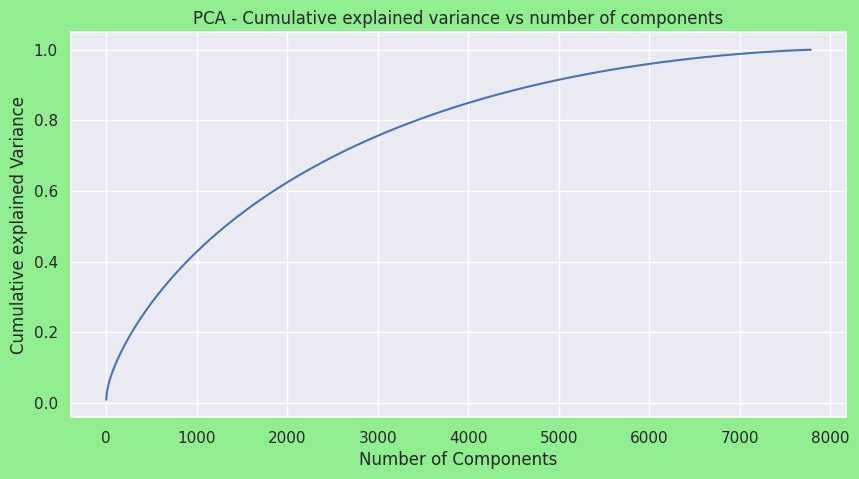

In [90]:
# Explained variance for different number of components

plt.figure(figsize=(10, 5),facecolor='lightgreen')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained Variance')

* We find that **100% **of the variance is explained by about** ~7500 components**.

* Also, more than **80% **of the variance is explained just by** 4000 components**.

* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [91]:
# reducing the dimensions to 4000 using pca

pca = PCA(n_components= 4000, random_state =42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [92]:
# Tranformed features
x_pca = pca.transform(X)

In [93]:
# Shape of transformed vectors
x_pca.shape

(7787, 4000)

We have successfully reduced the dimensionality of data using PCA.

## ***7. ML Clustering Model Implementation:***

### **K-Means Clustering:**

Building clusters using the K-means clustering algorithm.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

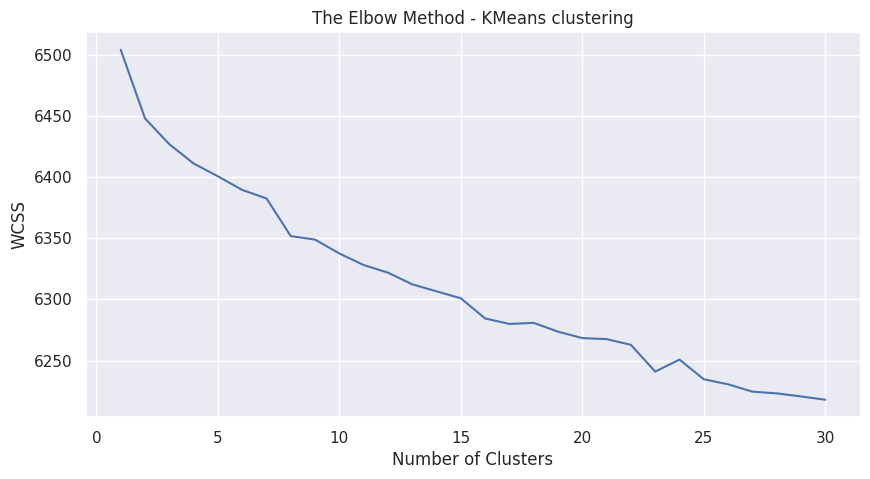

In [94]:
# Elbow methond to find the Optimal value of k

wcss = []
for i in range(1, 31):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1, 31)
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 15)  # Start from 2, as silhouette score isn't defined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'k={k}, Silhouette Score={score:.4f}')

# Find the optimal k with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'\nOptimal k (Highest Silhouette Score): {optimal_k} with score {max(silhouette_scores):.4f}')


k=2, Silhouette Score=0.0046
k=3, Silhouette Score=0.0058
k=4, Silhouette Score=0.0065
k=5, Silhouette Score=0.0068
k=6, Silhouette Score=0.0051
k=7, Silhouette Score=0.0044
k=8, Silhouette Score=0.0077
k=9, Silhouette Score=0.0072
k=10, Silhouette Score=0.0064
k=11, Silhouette Score=0.0070
k=12, Silhouette Score=0.0052
k=13, Silhouette Score=0.0056
k=14, Silhouette Score=0.0060

Optimal k (Highest Silhouette Score): 8 with score 0.0077


**The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.**

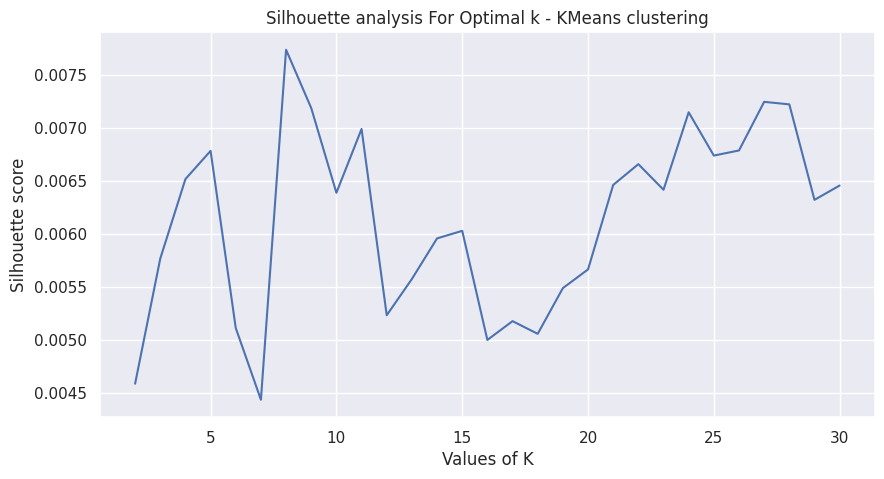

In [96]:
# Plotting Silhouette score for different umber of clusters

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()


**The highest Silhouette score is obtained for 8 clusters.**

Building 8 clusters using the k-means clustering algorithm:

In [97]:
# Clustering the data into 8 clusters

kmeans = KMeans(n_clusters=8,init='k-means++',random_state=33)
kmeans.fit(x_pca)


KMeans(random_state=33)

In [98]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6351.688070340277, 0.007738877261364246)


In [99]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

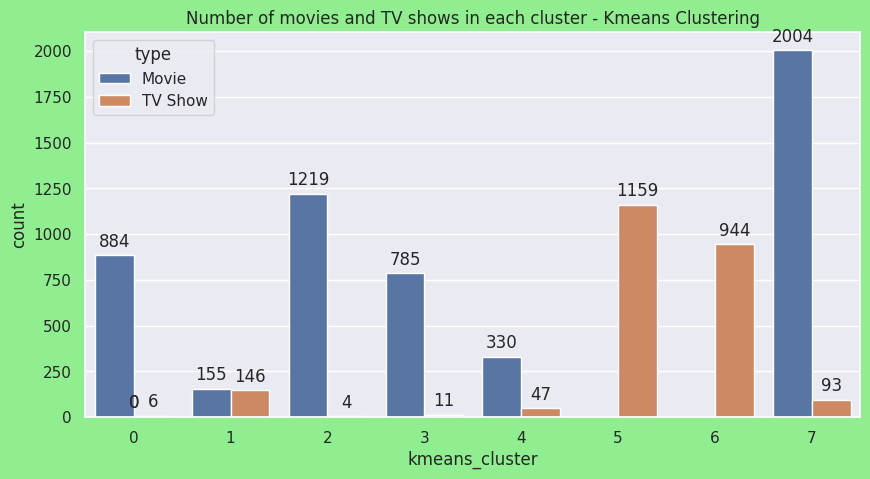

In [100]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5),facecolor='lightgreen')
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Successfully built 8 clusters using the k-means clustering algorithm.**

###  Building wordclouds for different clusters built:

In [101]:
#  Building a wordcloud for the movie descriptions

def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # Iterate through the csv file

  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

    comment_words += ' '.join(tokens)+' '

  wordcloud = WordCloud(width = 700, height = 700,
                        background_color = 'white',
                        stopwords = stopwords,
                        min_font_size= 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize= (10, 5))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad=0)


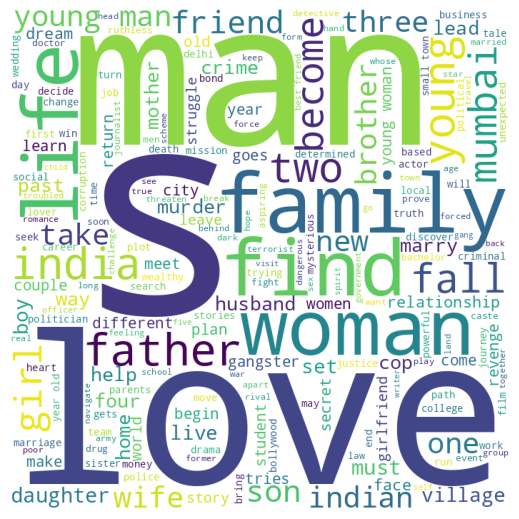

In [102]:
# WordClopud for Cluster 0

kmeans_worldcloud(0)

Keywords observed in Cluster 0: love, man, family, find, woman,life

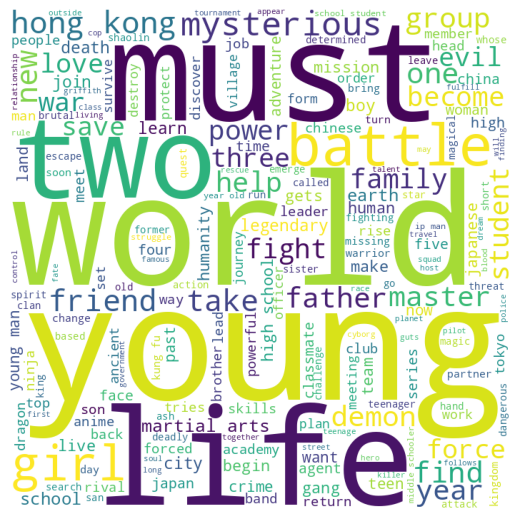

In [103]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

Keywords observed in Cluster 1: Young, World, life, mustr, two,battle

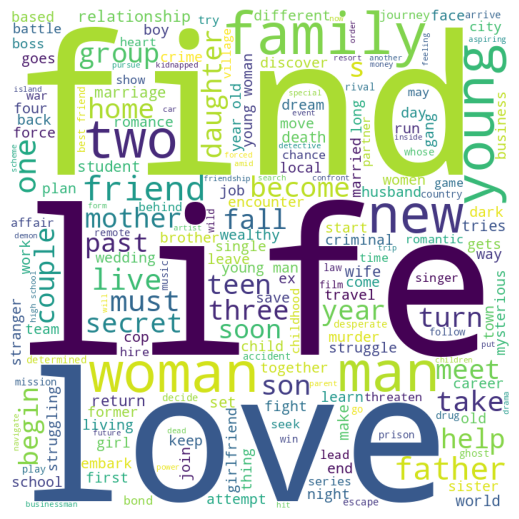

In [104]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

Keywords observed in Cluster 2: Life, find, love, young, family,two,nwe,womanman

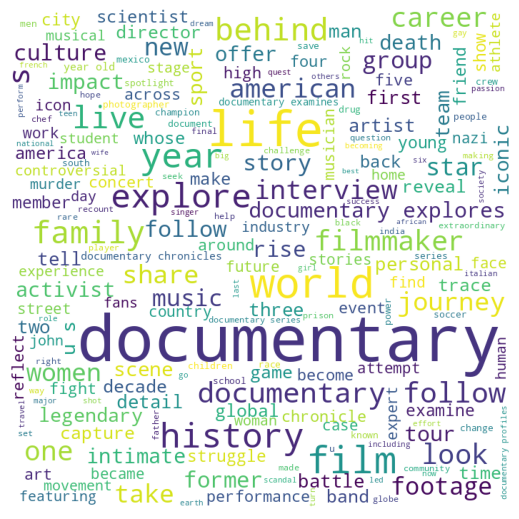

In [105]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

Keywords observed in Cluster 3: Documentary, life, explore, history, flim, history, explore

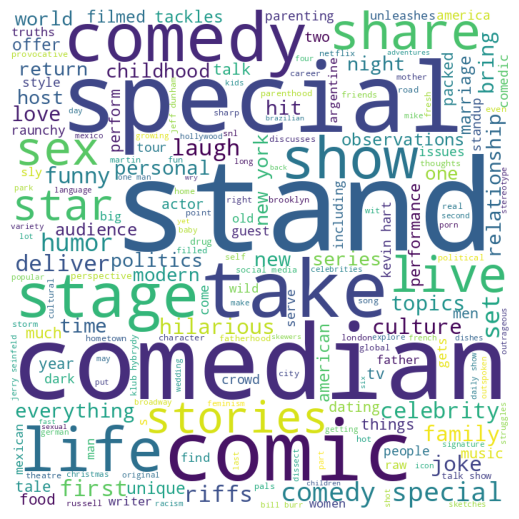

In [106]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

Keywords observed in Cluster 4: Stand, Comedian, special, comic, comedy, take, stage, life, live, show, live

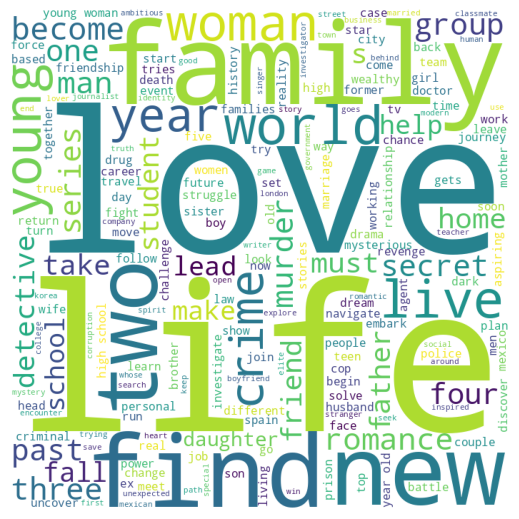

In [107]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life

Keywords observed in Cluster 5: life, love, family, find, new,two, world, live, young, year, crime,

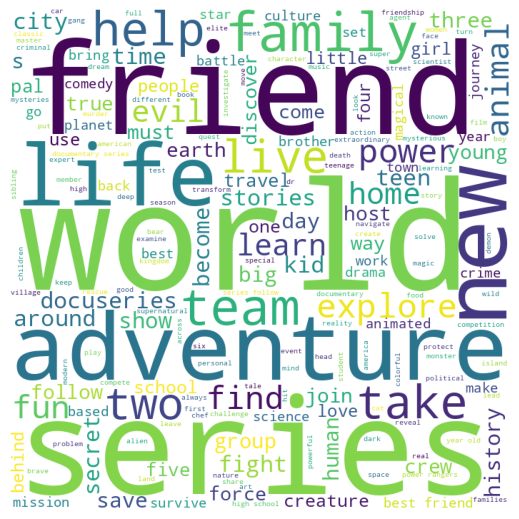

In [108]:
# Wordcloud for cluster 6
kmeans_worldcloud(6)

Keywords observed in Cluster 6: World, series, friend, life, adventure, new, team,two, take,family, help,power

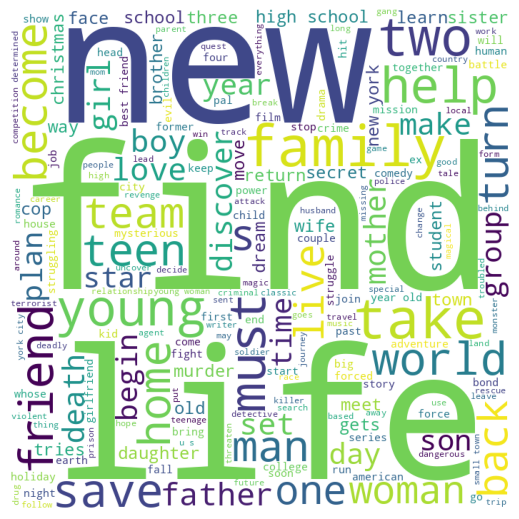

In [109]:
# Wordcloud for cluster 7
kmeans_worldcloud(7)

Keywords observed in Cluster 7: find, life, new, two,save,friend, became, one, young, turn, world, take, home, woman

###  **Hierarchical clustering:**

Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

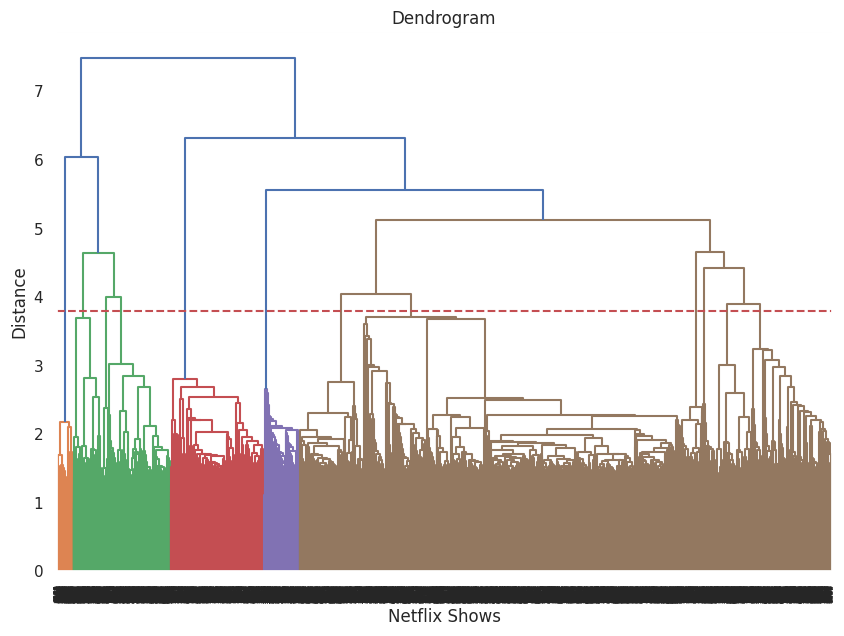

In [110]:
# Building a dendogram to decide on the number of Clusters

plt.figure(figsize= (10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

**At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.**

Building 12 clusters using the Agglomerative clustering algorithm:

In [111]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, metric='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([3, 5, 1, ..., 4, 2, 4])

In [112]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

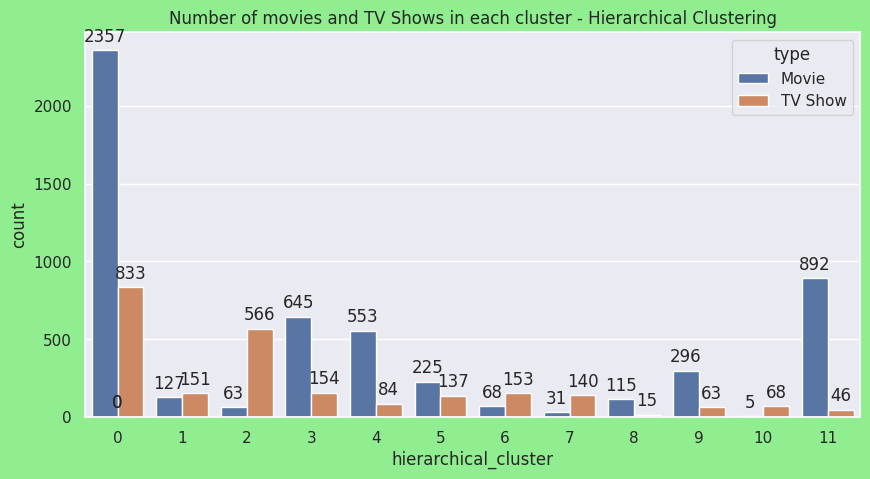

In [116]:
# Number of Kmeans cluster number attribute

plt.figure(figsize=(10, 5), facecolor='lightgreen')
q = sns.countplot(x='hierarchical_cluster', data=df1, hue='type')
plt.title('Number of movies and TV Shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()),
             ha = 'center', va= 'center', xytext = (0,10), textcoords = 'offset points')

Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

### **Building wordclouds for different clusters built:**

In [119]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

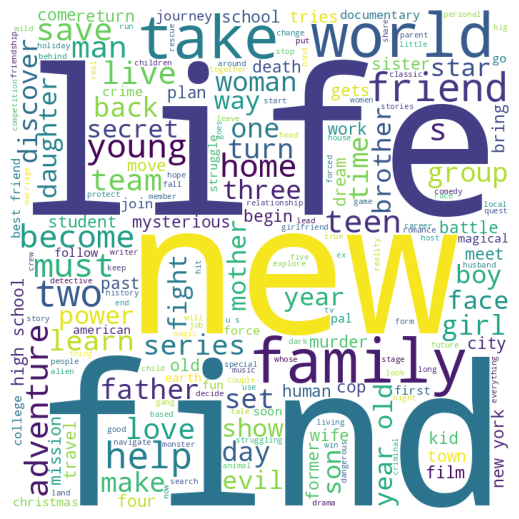

In [120]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

Keywords observed in cluster 0: life, new, find, family, world, take,friend,two,young, help,home

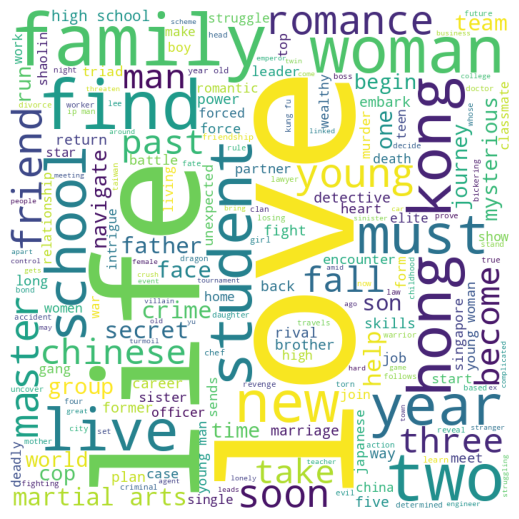

In [121]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

 Keywords observed in cluster 1: love, life, family, two,woman, find, school, hong kong, must,year, live

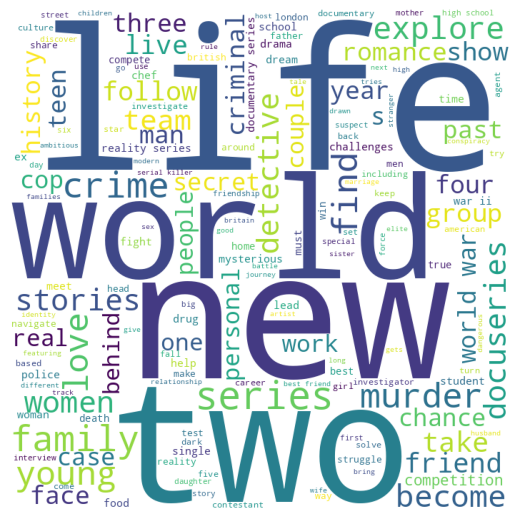

In [122]:
# WordCloud for cluster 2

hierarchical_worldcloud(2)

Keywords observed in cluster 2: life, new, two, world, series, murder, explore, crime,find, documentries, stiroes

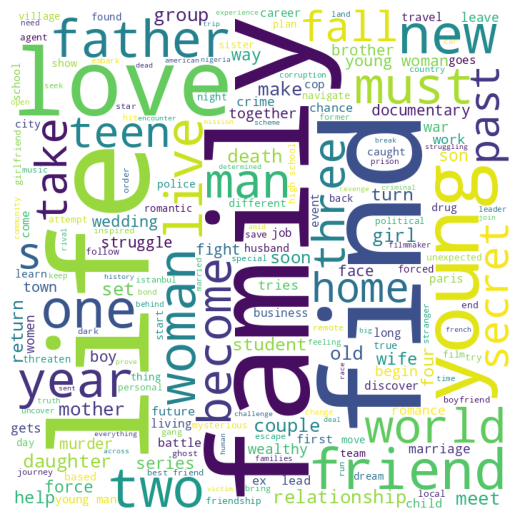

In [123]:
# WordCloud for cluster 3

hierarchical_worldcloud(3)

Keywords observed in cluster 3: family, life, find, young, new, father, friend, one, year, two, world, women,must, past

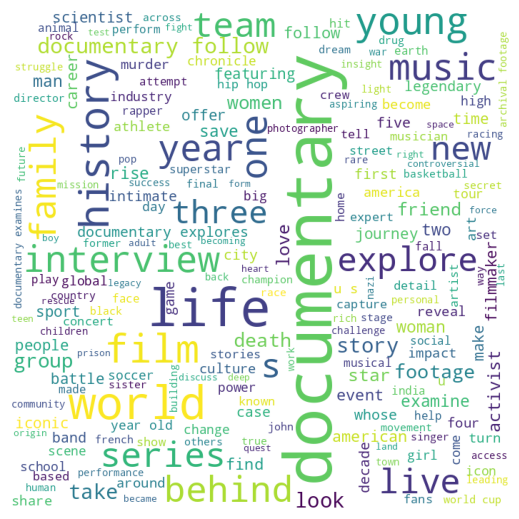

In [124]:
# WordCloud for cluster 4

hierarchical_worldcloud(4)

Keywords observed in cluster 4: documentary, life, young, music, history, live, world, behind, year, explore, music, team, three, series

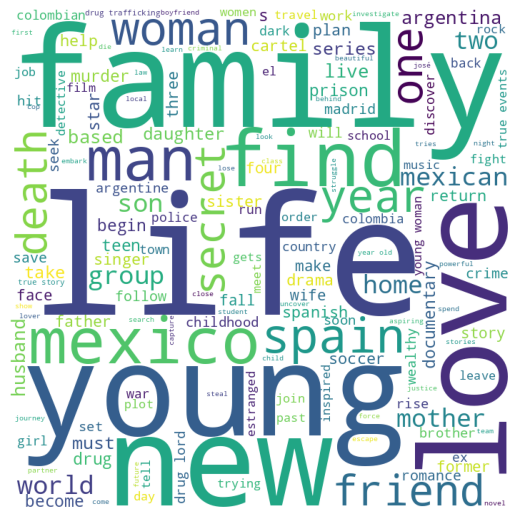

In [125]:
# WordCloud for cluster 5

hierarchical_worldcloud(5)

Keywords observed in cluster 5: life,family, young, love, new, find, mexoco, year, man,friend, spain,one, woman, secret

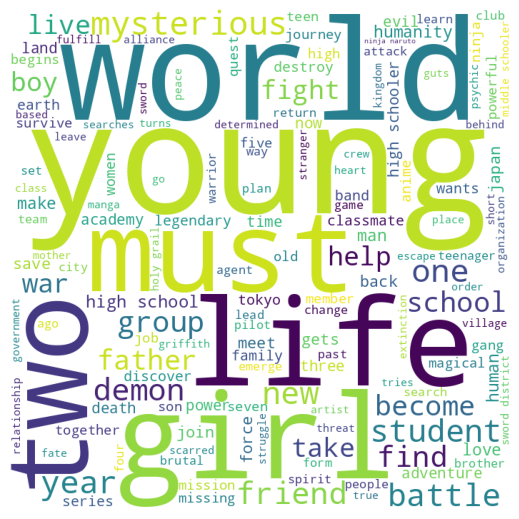

In [126]:
# WordCloud for cluster 6

hierarchical_worldcloud(6)

Keywords observed in cluster 6: Young, world, life, girl, two, must, student, mysterious, friend, battle, student

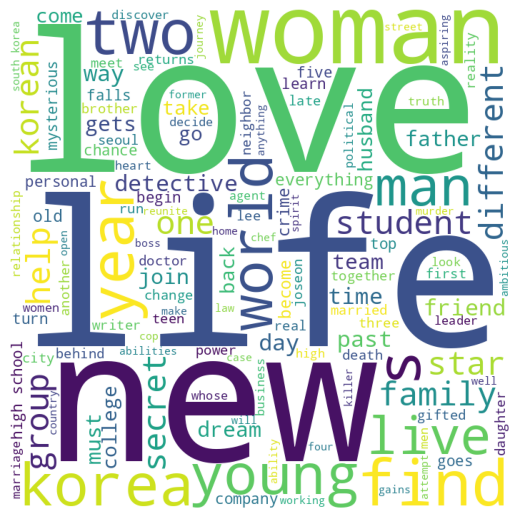

In [127]:
# WordCloud for cluster 7

hierarchical_worldcloud(7)

Keywords observed in cluster 7: life, love, new, woman, find, korea, live, world, man, two, different, family

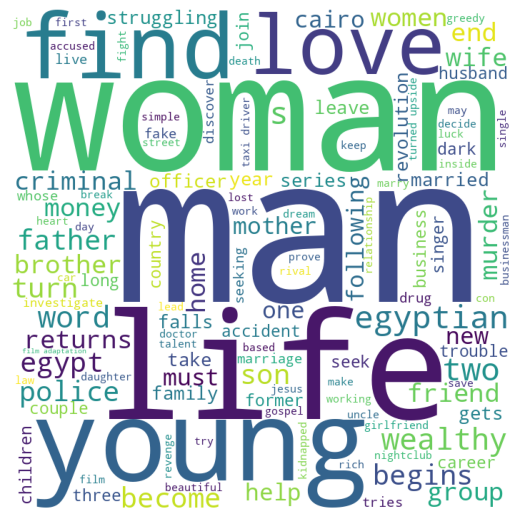

In [128]:
# WordCloud for cluster 8

hierarchical_worldcloud(8)

Keywords observed in cluster 8: man, life, woman, young, find, love, egyptian, begins, criminal, police, father, weathly

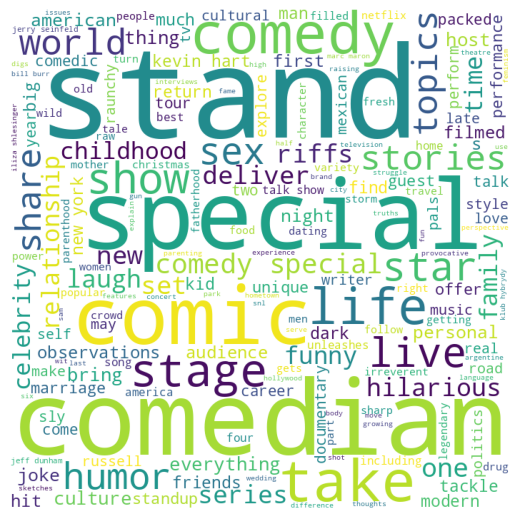

In [129]:

# WordCloud for cluster 9

hierarchical_worldcloud(9)

Keywords observed in cluster 9: stand, comedian, special, comic, comedy,take, stage, live, life, show, star, stories, sex, humor, world, childhood

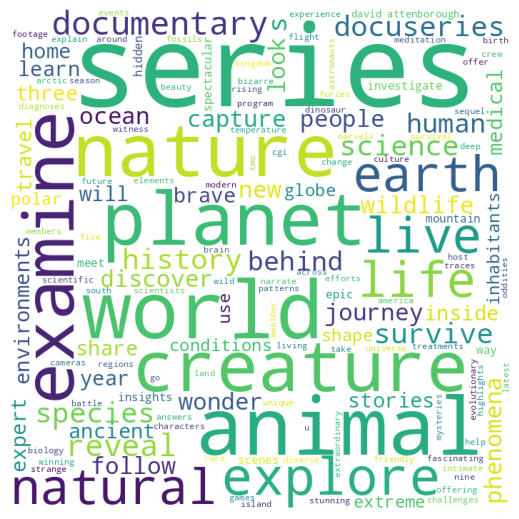

In [130]:
# WordCloud for cluster 10

hierarchical_worldcloud(10)

Keywords observed in cluster 10: series, world, animal, creature, planet, examine, nature, natural, earth, live,life,reveal, species, documentary

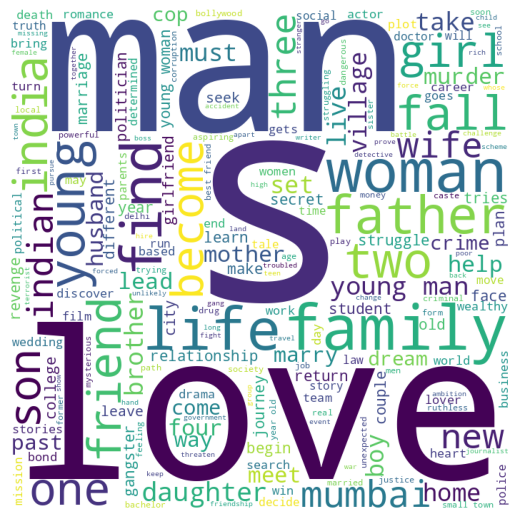

In [131]:
# WordCloud for cluster 11

hierarchical_worldcloud(11)

Keywords observed in cluster 11: love, man, s, family, woman, life, young, find, father, two, friend, fall, girl,become, mumbai, three,one

## ***8. Content based recommender system:***

* We can build a simple content based recommender system based on the similarity of the shows.

* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.

* To get the similarity score of the shows, we can use cosine similarity.

* The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

 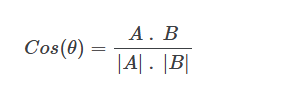

In [134]:
# Defining a new df for building a recommender system
recommender_df = df1.copy()

In [135]:
# Chanaging the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [136]:
# Converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [137]:
# Setting title of movies/TV Shows as index
recommender_df.set_index('title', inplace=True)


In [138]:
# Counter vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])


In [139]:
# Cosine Similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [140]:
cosine_similarity.shape

(7787, 7787)

In [141]:
# Developing a funvtion to get 10 recommendations for a show

indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending =False)
    top10 = list(series.iloc[1:11].index)

    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])

    print('If you liked','title','you may also enjoy:\n')
    return recommend_content

  except:
    return 'Invalid Entry'

In [142]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked title you may also enjoy:



['Mr. Sunshine',
 'One Spring Night',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'My Little Baby',
 'Reply 1994',
 'Extracurricular',
 'My Secret Romance',
 'Chef & My Fridge']

In [143]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked title you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'Jack Taylor',
 'Better Call Saul',
 'Dramaworld',
 'Father Brown',
 "Marvel's Iron Fist",
 'Young Wallander',
 'No Good Nick']

In [144]:
# Recommendations for '1234'
recommend_10('1234')

'Invalid Entry'

In [145]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked title you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Scream',
 'Warrior Nun',
 'Nightflyers',
 'Zombie Dumb',
 'Kiss Me First',
 'The Vampire Diaries']

In [146]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked title you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'My Hotter Half',
 'The Murder Detectives',
 'I AM A KILLER: RELEASED']

## ***9. Conclusions:***

* In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

* The dataset contained about 7787 records, and 12 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

* Through TFIDF Vectorization, we created a total of 20000 attributes.

* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 8. This was obtained through the elbow method and Silhouette score analysis.

* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.